In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

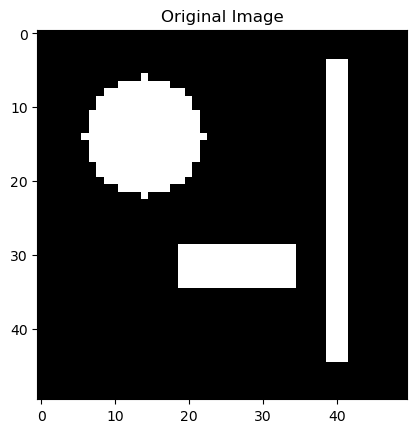

In [2]:
#load data and show image
mat = scipy.io.loadmat('cs.mat')
img = mat['img']

plt.imshow(img,  cmap='gray')
plt.title('Original Image')
plt.savefig('original.png')

In [3]:
#set A and y
np.random.seed(55)

A = np.random.randn(1300, 2500)
epsilon = np.random.normal(loc=0, scale=5, size=1300)
y = A.dot(img.ravel()) + epsilon

### Lasso Regression

In [4]:
#lassoCV model with 10 fold cv
l_cv = LassoCV(cv=10, random_state=55).fit(A, y)
y_pred = l_cv.predict(A)
l_mse = mean_squared_error(y, y_pred)

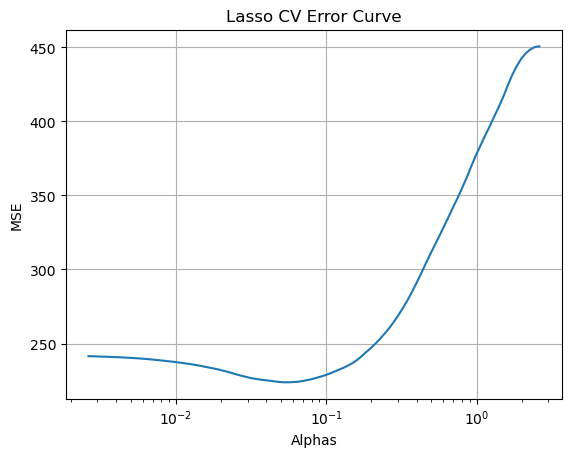

Optimal Lasso Alpha Value:  0.052629708384665304
Lasso MSE:  3.8311532707025426


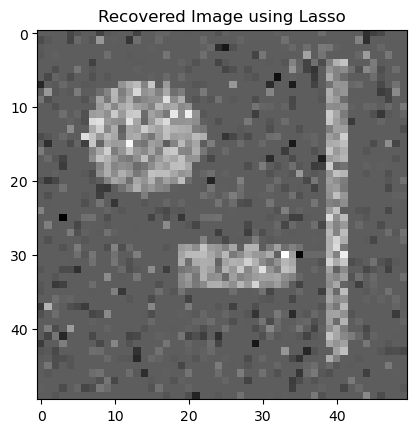

In [14]:
#Plot Lasso cv curve
plt.semilogx(l_cv.alphas_, l_cv.mse_path_.mean(axis=1))
plt.xlabel('Alphas')
plt.ylabel('MSE')
plt.title('Lasso CV Error Curve')
plt.grid(True)
plt.savefig('lasso_cv.png')
plt.show()

print('Optimal Lasso Alpha Value: ', l_cv.alpha_)
print('Lasso MSE: ', l_mse)

# recovered image
rec_img = l_cv.coef_.reshape(img.shape)
plt.imshow(rec_img, cmap='gray')
plt.title('Recovered Image using Lasso')
plt.savefig('lasso_img.png')
plt.show()

### Ridge Regression

In [16]:
# lassoCV model with 10 fold cv
alpha_vals = np.logspace(-4, 4, 50)  # Range of alpha values to try
mse_vals = []

for alpha in alpha_vals:
    ridge = Ridge(alpha=alpha)
    scores = cross_val_score(ridge, A, y, cv=10, scoring='neg_mean_squared_error')
    mse_vals.append(np.mean(-scores))

min_mse_ind = np.argmin(mse_vals)    
opt_alpha = alpha_vals[min_mse_ind]
r_mse = min(mse_vals)

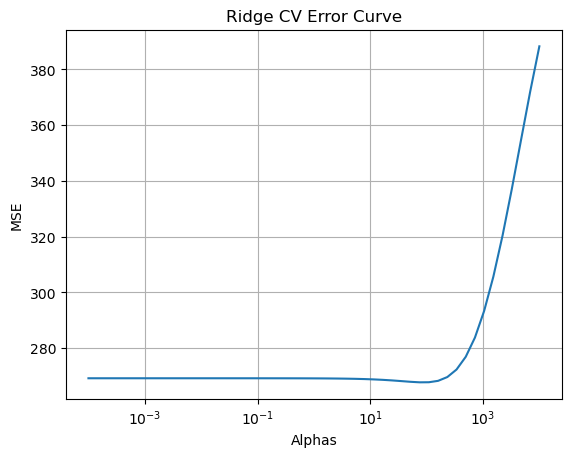

Optimal Ridge Alpha Value: 75.43120063354607
Ridge MSE: 267.67937286904515


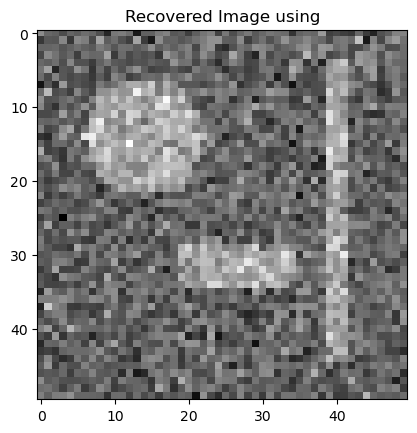

In [17]:
# Plot Cross-Validation Curve
plt.semilogx(alpha_vals, mse_vals)
plt.xlabel('Alphas')
plt.ylabel('MSE')
plt.title('Ridge CV Error Curve')
plt.grid(True)
plt.savefig('ridge_cv.png')
plt.show()

print('Optimal Ridge Alpha Value:', opt_alpha)
print('Ridge MSE:', r_mse)

# recovered image
ridge_model = Ridge(alpha=opt_alpha).fit(A, y)
rec_img_2 = ridge_model.coef_.reshape(img.shape)
plt.imshow(rec_img_2, cmap='gray')
plt.title('Recovered Image using')
plt.savefig('ridge_img.png')
plt.show()